In [1]:
import os, sys, time, copy
import numpy as np
import matplotlib.pyplot as plt

import myokit
sys.path.append('../')
sys.path.append('../Protocols')
sys.path.append('../Models')
sys.path.append('../Lib')
import protocol_lib
from br1977 import BR1977

In [2]:
'''
Beeler and Reuter 1977
'''
end_time = 500

In [3]:
import simulator_myokit
'''
Simulation with Myokit
'''
model_path = "../mmt-model-files/br-1977.mmt" 
model_myokit, protocol_myokit, script = myokit.load(model_path)
sim_myokit = simulator_myokit.Simulator(model_myokit, protocol_myokit, max_step=None, abs_tol=1e-08, rel_tol=1e-10)  # 1e-12, 1e-14  # 1e-08, 1e-10
sim_myokit.name = "br1977"
times = np.linspace(0, end_time, 5000)
sim_myokit.bcl = 1000

simulated_models_myokit = []
start_time = time.time()
# y0 = sim_myokit.pre_simulate( 1000*100, sim_type=1)
d = sim_myokit.simulate(end_time=end_time)
simulated_models_myokit.append(d)
    
print("--- %s seconds ---"%(time.time()-start_time))

--- 0.007269382476806641 seconds ---


In [4]:
import simulator_scipy
'''
Simulation with BDF
'''
protocol = protocol_lib.PacingProtocol(level=1, start=100, length=2, period=1000, multiplier=0, default_time_unit='ms')
model = BR1977(protocol)
sim_bdf = simulator_scipy.Simulator(model)

simulated_models_BDF = []

start_time = time.time()

# t_eval = np.linspace(0, t_span[1], 5000)  
sim_bdf.simulate(t_span=(0, end_time), method='BDF', max_step=1, atol=1E-6, rtol=1E-3)       
simulated_models_BDF.append(copy.copy(model))

print("--- %s seconds ---"%(time.time()-start_time))

--- 0.3148932456970215 seconds ---


In [5]:
import simulator_euler
'''
Simulation with Euler
'''
sim_euler = simulator_euler.Simulator(model)

simulated_models_Euler = []

start_time = time.time()

sim_euler.dt = 0.02
sim_euler.simulate(end_time=end_time)      
simulated_models_Euler.append(copy.copy(model))

print("--- %s seconds ---"%(time.time()-start_time))

--- 1.190011739730835 seconds ---


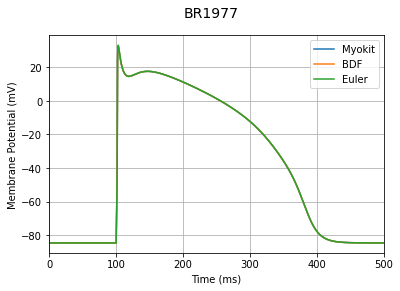

In [6]:
'''
Plot
'''
fig, ax = plt.subplots(figsize=(6,4))    
fig.suptitle(model.name, fontsize=14)

myokit = simulated_models_myokit[0]
bdf = simulated_models_BDF[0]
euler = simulated_models_Euler[0]


# ax.set_title('Simulation %d'%(simulationNo))
ax.set_xlim(bdf.times.min(), bdf.times.max())
# ax.set_ylim(ylim[0], ylim[1])
ax.set_ylabel('Membrane Potential (mV)')  
ax.set_xlabel('Time (ms)')       

ax.plot( myokit['engine.time'], myokit['membrane.V'], label='Myokit') 
ax.plot(bdf.times, bdf.V, label='BDF')   
ax.plot(euler.times, euler.V, label='Euler')   

# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], \
#             GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
ax.grid()

#     print(bdf.V)
#     print(euler.V)
#     print("-"*100)
    
plt.show()
fig.savefig(os.path.join('Results', "BR1977-all"), dpi=100)

In [7]:
print("Complete")

Complete
